In [1]:
import numpy  as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from matplotlib.pylab import rcParams
import itertools

In [2]:
data =pd.read_csv('data-Hamburgstation.csv')
data.head()


,date,id,stid,e5,e10,diesel,changed
0,5/1/2016 21:26,1691,51d4b4ff-a095-1aa0-e100-80009459e03a,1259,1239,999,63
1,5/1/2016 23:05,22492,51d4b4ff-a095-1aa0-e100-80009459e03a,1319,1299,1069,21
2,5/2/2016 6:17,33677,51d4b4ff-a095-1aa0-e100-80009459e03a,1299,1279,1049,21
3,5/2/2016 9:57,60370,51d4b4ff-a095-1aa0-e100-80009459e03a,1279,1259,1019,21
4,5/2/2016 11:45,71060,51d4b4ff-a095-1aa0-e100-80009459e03a,1269,1249,1009,21


In [3]:
print(data.dtypes)
n_sample=data.shape[0]
print(data.shape)
#print(data.head())

date       object
id          int64
stid       object
e5          int64
e10         int64
diesel      int64
changed     int64
dtype: object
(12136, 7)


In [4]:
print(data.columns)

Index(['date', 'id', 'stid', 'e5', 'e10', 'diesel', 'changed'], dtype='object')


In [5]:
from datetime import datetime
con=data['date']
data['date']=pd.to_datetime(data['date'])
data.set_index('date',inplace=True)
data.index

DatetimeIndex(['2016-05-01 21:26:00', '2016-05-01 23:05:00',
               '2016-05-02 06:17:00', '2016-05-02 09:57:00',
               '2016-05-02 11:45:00', '2016-05-02 12:37:00',
               '2016-05-02 14:17:00', '2016-05-02 15:45:00',
               '2016-05-02 17:45:00', '2016-05-02 23:03:00',
               ...
               '2018-10-10 07:24:00', '2018-10-10 08:23:00',
               '2018-10-10 09:23:00', '2018-10-10 10:23:00',
               '2018-10-10 11:25:00', '2018-10-10 12:47:00',
               '2018-10-10 13:53:00', '2018-10-10 17:10:00',
               '2018-10-10 18:08:00', '2018-10-10 18:56:00'],
              dtype='datetime64[ns]', name='date', length=12136, freq=None)

In [6]:
print(data.columns)

Index(['id', 'stid', 'e5', 'e10', 'diesel', 'changed'], dtype='object')


In [7]:
data.head(100)

,id,stid,e5,e10,diesel,changed
date,,,,,,
2016-05-01 21:26:00,1691,51d4b4ff-a095-1aa0-e100-80009459e03a,1259,1239,999,63
2016-05-01 23:05:00,22492,51d4b4ff-a095-1aa0-e100-80009459e03a,1319,1299,1069,21
2016-05-02 06:17:00,33677,51d4b4ff-a095-1aa0-e100-80009459e03a,1299,1279,1049,21
2016-05-02 09:57:00,60370,51d4b4ff-a095-1aa0-e100-80009459e03a,1279,1259,1019,21
2016-05-02 11:45:00,71060,51d4b4ff-a095-1aa0-e100-80009459e03a,1269,1249,1009,21
2016-05-02 12:37:00,83216,51d4b4ff-a095-1aa0-e100-80009459e03a,1289,1269,1029,21
2016-05-02 14:17:00,99575,51d4b4ff-a095-1aa0-e100-80009459e03a,1269,1249,1009,21
2016-05-02 15:45:00,111744,51d4b4ff-a095-1aa0-e100-80009459e03a,1259,1239,999,21
2016-05-02 17:45:00,122889,51d4b4ff-a095-1aa0-e100-80009459e03a,1259,1239,989,1


In [8]:
data.tail(50)

,id,stid,e5,e10,diesel,changed
date,,,,,,
2018-10-06 17:10:00,138074364,51d4b4ff-a095-1aa0-e100-80009459e03a,1529,1509,1379,21
2018-10-06 18:08:00,138092244,51d4b4ff-a095-1aa0-e100-80009459e03a,1499,1479,1349,21
2018-10-06 18:53:00,138102905,51d4b4ff-a095-1aa0-e100-80009459e03a,1449,1429,1329,21
2018-10-07 06:31:00,138131861,51d4b4ff-a095-1aa0-e100-80009459e03a,1529,1509,1409,21
2018-10-07 07:23:00,138138376,51d4b4ff-a095-1aa0-e100-80009459e03a,1519,1499,1399,21
2018-10-07 08:22:00,138148551,51d4b4ff-a095-1aa0-e100-80009459e03a,1509,1489,1389,21
2018-10-07 09:07:00,138158985,51d4b4ff-a095-1aa0-e100-80009459e03a,1499,1479,1349,21
2018-10-07 09:53:00,138168400,51d4b4ff-a095-1aa0-e100-80009459e03a,1489,1469,1339,21
2018-10-07 11:53:00,138186339,51d4b4ff-a095-1aa0-e100-80009459e03a,1479,1459,1329,21


In [9]:
del data['id']

In [10]:

del data['stid']


In [11]:
del data['e5']


In [12]:
del data['e10']

In [13]:
del data['changed']


In [14]:
data.head()

,diesel
date,
2016-05-01 21:26:00,999
2016-05-01 23:05:00,1069
2016-05-02 06:17:00,1049
2016-05-02 09:57:00,1019
2016-05-02 11:45:00,1009


In [15]:
print(data.dtypes)

diesel    int64
dtype: object


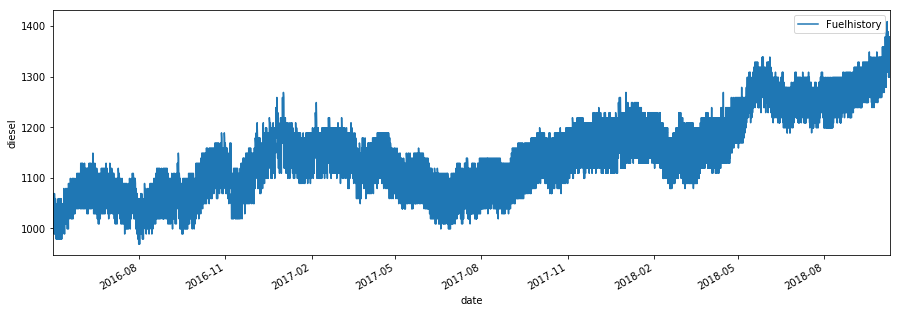

In [16]:
my_plot=data.plot(kind='line',figsize=(15,5))
my_plot.set_xlabel("date")
my_plot.set_ylabel("diesel")
my_plot.legend(["Fuelhistory"])

In [17]:
data.isnull()

,diesel
date,
2016-05-01 21:26:00,False
2016-05-01 23:05:00,False
2016-05-02 06:17:00,False
2016-05-02 09:57:00,False
2016-05-02 11:45:00,False
2016-05-02 12:37:00,False
2016-05-02 14:17:00,False
2016-05-02 15:45:00,False
2016-05-02 17:45:00,False


In [18]:
data.describe()

,diesel
count,12136.000000
mean,1136.883158
std,74.752121
min,969.000000
25%,1079.000000
50%,1129.000000
75%,1179.000000
max,1409.000000


In [19]:

data=data['2016-5-2':'2018-10-9']
print(data.dtypes)

diesel    int64
dtype: object


In [20]:
print(data.index[0],data.index[-1])

2016-05-02 06:17:00 2018-10-09 18:53:00


In [21]:
mid=pd.date_range(data.index[0],data.index[-1],freq="H",normalize=True)
mid

DatetimeIndex(['2016-05-02 00:00:00', '2016-05-02 01:00:00',
               '2016-05-02 02:00:00', '2016-05-02 03:00:00',
               '2016-05-02 04:00:00', '2016-05-02 05:00:00',
               '2016-05-02 06:00:00', '2016-05-02 07:00:00',
               '2016-05-02 08:00:00', '2016-05-02 09:00:00',
               ...
               '2018-10-08 15:00:00', '2018-10-08 16:00:00',
               '2018-10-08 17:00:00', '2018-10-08 18:00:00',
               '2018-10-08 19:00:00', '2018-10-08 20:00:00',
               '2018-10-08 21:00:00', '2018-10-08 22:00:00',
               '2018-10-08 23:00:00', '2018-10-09 00:00:00'],
              dtype='datetime64[ns]', length=21361, freq='H')

In [22]:
new_index=mid.union(data.index)
upsampled_data=data.reindex(new_index)
upsampled_data.head(20)



,diesel
2016-05-02 00:00:00,NaN
2016-05-02 01:00:00,NaN
2016-05-02 02:00:00,NaN
2016-05-02 03:00:00,NaN
2016-05-02 04:00:00,NaN
2016-05-02 05:00:00,NaN
2016-05-02 06:00:00,NaN
2016-05-02 06:17:00,1049.0
2016-05-02 07:00:00,NaN
2016-05-02 08:00:00,NaN


In [23]:
upsampled_data.isnull()



,diesel
2016-05-02 00:00:00,True
2016-05-02 01:00:00,True
2016-05-02 02:00:00,True
2016-05-02 03:00:00,True
2016-05-02 04:00:00,True
2016-05-02 05:00:00,True
2016-05-02 06:00:00,True
2016-05-02 06:17:00,False
2016-05-02 07:00:00,True
2016-05-02 08:00:00,True


In [24]:
upsampled_data = upsampled_data.iloc[7:]
upsampled_data.head(100)


,diesel
2016-05-02 06:17:00,1049.0
2016-05-02 07:00:00,NaN
2016-05-02 08:00:00,NaN
2016-05-02 09:00:00,NaN
2016-05-02 09:57:00,1019.0
2016-05-02 10:00:00,NaN
2016-05-02 11:00:00,NaN
2016-05-02 11:45:00,1009.0
2016-05-02 12:00:00,NaN
2016-05-02 12:37:00,1029.0


In [25]:

upsampled_data = upsampled_data.fillna(method='ffill')

upsampled_data.head(100)

,diesel
2016-05-02 06:17:00,1049.0
2016-05-02 07:00:00,1049.0
2016-05-02 08:00:00,1049.0
2016-05-02 09:00:00,1049.0
2016-05-02 09:57:00,1019.0
2016-05-02 10:00:00,1019.0
2016-05-02 11:00:00,1019.0
2016-05-02 11:45:00,1009.0
2016-05-02 12:00:00,1009.0
2016-05-02 12:37:00,1029.0


In [26]:
#upsampled_data=data.reindex(new_index)
df=upsampled_data.astype(int)
df.head(20)

,diesel
2016-05-02 06:17:00,1049
2016-05-02 07:00:00,1049
2016-05-02 08:00:00,1049
2016-05-02 09:00:00,1049
2016-05-02 09:57:00,1019
2016-05-02 10:00:00,1019
2016-05-02 11:00:00,1019
2016-05-02 11:45:00,1009
2016-05-02 12:00:00,1009
2016-05-02 12:37:00,1029


In [27]:
df.describe()

,diesel
count,33420.000000
mean,1137.666068
std,74.449923
min,969.000000
25%,1089.000000
50%,1129.000000
75%,1189.000000
max,1409.000000


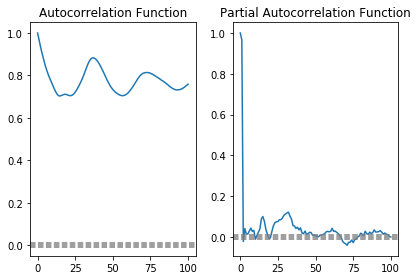

In [28]:
def Plot_ACF_PACF(value):
    lag_acf = acf(value, nlags=100)
    lag_pacf = pacf(value, nlags=100, method='ols')
    plt.subplot(121) 
    plt.plot(lag_acf)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(value)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(value,)),linestyle='--',color='gray')
    plt.title('Autocorrelation Function')
    plt.subplot(122)
    plt.plot(lag_pacf)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(value)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(value)),linestyle='--',color='gray')
    plt.title('Partial Autocorrelation Function')
    plt.tight_layout()
Plot_ACF_PACF(df.diesel)

In [29]:

Monthly_data=df['2017-9-2':'2017-10-2']
Monthly_data.head(100)

,diesel
2017-09-02 00:00:00,1149
2017-09-02 01:00:00,1149
2017-09-02 02:00:00,1149
2017-09-02 03:00:00,1149
2017-09-02 04:00:00,1149
2017-09-02 05:00:00,1149
2017-09-02 06:00:00,1149
2017-09-02 06:42:00,1139
2017-09-02 07:00:00,1139
2017-09-02 08:00:00,1139


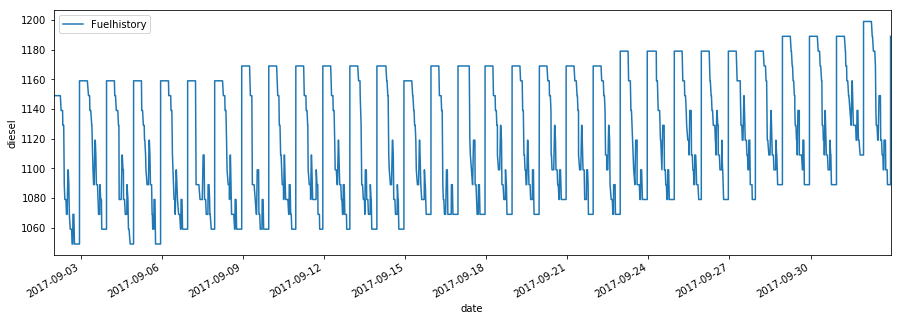

In [30]:
my_plot=Monthly_data.plot(kind='line',figsize=(15,5))
my_plot.set_xlabel("date")
my_plot.set_ylabel("diesel")
my_plot.legend(["Fuelhistory"])


In [31]:
#train=df.loc['2016-05-02':'2018-06-02']
#test=df.loc['2018-06-03':]

In [81]:
df.head()

,diesel
date,
2016-05-02 06:17:00,1049
2016-05-02 07:00:00,1049
2016-05-02 08:00:00,1049
2016-05-02 09:00:00,1049
2016-05-02 09:57:00,1019


In [33]:
df.index.name='date'
df.reset_index(inplace=True)
df.head()


,date,diesel
0,2016-05-02 06:17:00,1049
1,2016-05-02 07:00:00,1049
2,2016-05-02 08:00:00,1049
3,2016-05-02 09:00:00,1049
4,2016-05-02 09:57:00,1019


In [34]:
df['date']=pd.to_datetime(df['date'])
df.set_index('date',inplace=True)
df.index

DatetimeIndex(['2016-05-02 06:17:00', '2016-05-02 07:00:00',
               '2016-05-02 08:00:00', '2016-05-02 09:00:00',
               '2016-05-02 09:57:00', '2016-05-02 10:00:00',
               '2016-05-02 11:00:00', '2016-05-02 11:45:00',
               '2016-05-02 12:00:00', '2016-05-02 12:37:00',
               ...
               '2018-10-09 07:23:00', '2018-10-09 08:23:00',
               '2018-10-09 09:52:00', '2018-10-09 11:24:00',
               '2018-10-09 11:51:00', '2018-10-09 12:46:00',
               '2018-10-09 13:54:00', '2018-10-09 17:13:00',
               '2018-10-09 18:08:00', '2018-10-09 18:53:00'],
              dtype='datetime64[ns]', name='date', length=33420, freq=None)

In [88]:

tf=df['diesel']
tf.tail()
tf.describe()

count    33420.000000
mean      1137.666068
std         74.449923
min        969.000000
25%       1089.000000
50%       1129.000000
75%       1189.000000
max       1409.000000
Name: diesel, dtype: float64

In [89]:

percent_training=0.95
split_point=round(len(tf)*percent_training)
training,testing=tf[0:split_point],tf[split_point:]
print("Training Series:", "\n", training.head(), "\n")
print("Testing Series:", "\n", testing.tail())
testing.describe()

Training Series: 
 date
2016-05-02 06:17:00    1049
2016-05-02 07:00:00    1049
2016-05-02 08:00:00    1049
2016-05-02 09:00:00    1049
2016-05-02 09:57:00    1019
Name: diesel, dtype: int32 

Testing Series: 
 date
2018-10-09 12:46:00    1349
2018-10-09 13:54:00    1309
2018-10-09 17:13:00    1349
2018-10-09 18:08:00    1349
2018-10-09 18:53:00    1299
Name: diesel, dtype: int32


count    1671.000000
mean     1282.171753
std        32.387897
min      1219.000000
25%      1259.000000
50%      1279.000000
75%      1299.000000
max      1409.000000
Name: diesel, dtype: float64

count    31749.000000
mean      1130.060506
std         67.988382
min        969.000000
25%       1079.000000
50%       1129.000000
75%       1179.000000
max       1339.000000
Name: diesel, dtype: float64

In [85]:

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)
    
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
  

C:\Users\Bibek\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
C:\Users\Bibek\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  import sys


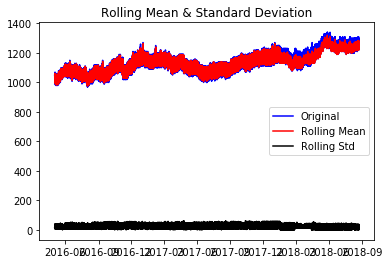

Results of Dickey-Fuller Test:
Test Statistic                    -2.621774
p-value                            0.088580
#Lags Used                        47.000000
Number of Observations Used    31701.000000
Critical Value (1%)               -3.430556
Critical Value (5%)               -2.861631
Critical Value (10%)              -2.566819
dtype: float64


In [86]:
  test_stationarity(training)

In [39]:
#from numpy import log
#X=log(tf)
#split = int(len(X) / 2)
#X1=X[0:split]
#X2 =X[split:]
#mean1, mean2 = X1.mean(), X2.mean()
#var1, var2 = X1.var(), X2.var()
#print('mean1=%f, mean2=%f' % (mean1, mean2))
#print('variance1=%f, variance2=%f' % (var1, var2))

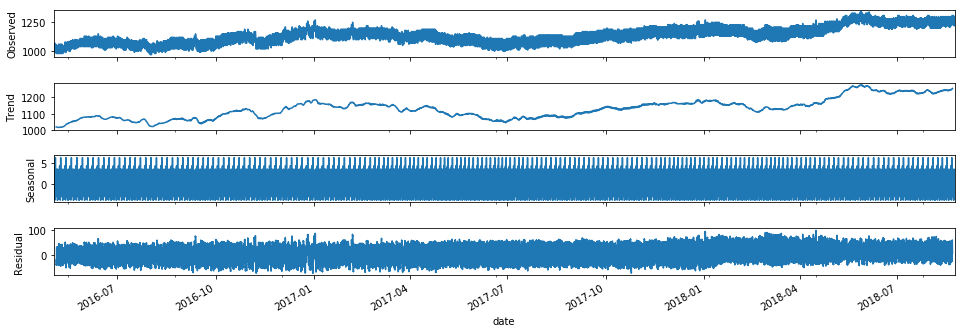

In [87]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(training,model="additive",filt=None, freq=168)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
fig = decomposition.plot()
fig.set_size_inches(15, 5)

In [41]:
tf_log=np.log(training)


C:\Users\Bibek\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
C:\Users\Bibek\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  import sys


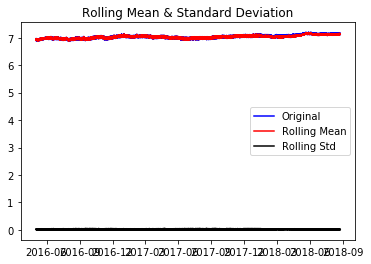

Results of Dickey-Fuller Test:
Test Statistic                    -2.697729
p-value                            0.074432
#Lags Used                        47.000000
Number of Observations Used    31701.000000
Critical Value (1%)               -3.430556
Critical Value (5%)               -2.861631
Critical Value (10%)              -2.566819
dtype: float64


In [42]:
test_stationarity(tf_log)

In [43]:

tf_log_diff=tf_log-tf_log.shift(1)
#tf_diff=tf_diff.iloc[1:]
#tf_log_diff=tf_log_diff.iloc[1:]
#tf_log_diff=tf_log-tf_log.shift(1)
tf_log_diff.head(50)

date
2016-05-02 06:17:00         NaN
2016-05-02 07:00:00    0.000000
2016-05-02 08:00:00    0.000000
2016-05-02 09:00:00    0.000000
2016-05-02 09:57:00   -0.029016
2016-05-02 10:00:00    0.000000
2016-05-02 11:00:00    0.000000
2016-05-02 11:45:00   -0.009862
2016-05-02 12:00:00    0.000000
2016-05-02 12:37:00    0.019628
2016-05-02 13:00:00    0.000000
2016-05-02 14:00:00    0.000000
2016-05-02 14:17:00   -0.019628
2016-05-02 15:00:00    0.000000
2016-05-02 15:45:00   -0.009960
2016-05-02 16:00:00    0.000000
2016-05-02 17:00:00    0.000000
2016-05-02 17:45:00   -0.010060
2016-05-02 18:00:00    0.000000
2016-05-02 19:00:00    0.000000
2016-05-02 20:00:00    0.000000
2016-05-02 21:00:00    0.000000
2016-05-02 22:00:00    0.000000
2016-05-02 23:00:00    0.000000
2016-05-02 23:03:00    0.077785
2016-05-03 00:00:00    0.000000
2016-05-03 01:00:00    0.000000
2016-05-03 02:00:00    0.000000
2016-05-03 03:00:00    0.000000
2016-05-03 04:00:00    0.000000
2016-05-03 05:00:00    0.000000
201

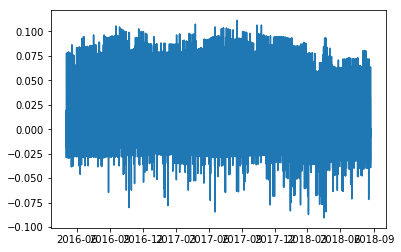

In [44]:
#tf_diff=tf_diff.iloc[1:]
tf_log_diff.dropna(inplace=True)
plt.plot(tf_log_diff)

C:\Users\Bibek\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  
C:\Users\Bibek\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  import sys


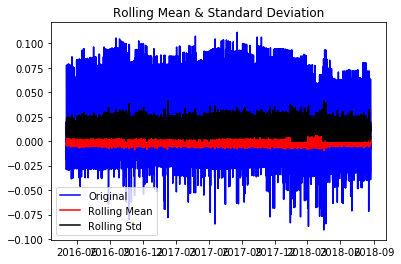

Results of Dickey-Fuller Test:
Test Statistic                   -50.689877
p-value                            0.000000
#Lags Used                        46.000000
Number of Observations Used    31701.000000
Critical Value (1%)               -3.430556
Critical Value (5%)               -2.861631
Critical Value (10%)              -2.566819
dtype: float64


In [45]:
test_stationarity(tf_log_diff)

In [46]:

#tf_decompose=residual
#tf_decompose.dropna(inplace=True)
#test_stationarity(tf_decompose)

In [47]:
#tf=tf.astype(float)

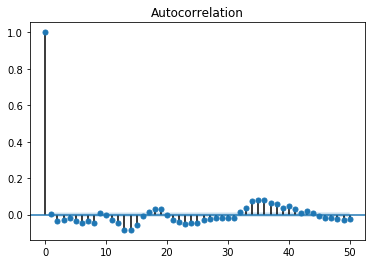

In [48]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(tf_log_diff,lags=50)
pyplot.show()

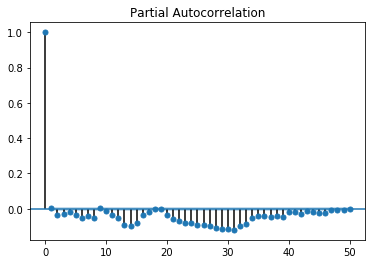

In [49]:
plot_pacf(tf_log_diff,lags=50)
pyplot.show()

C:\Users\Bibek\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Bibek\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5,1,'RSS: 8.9336')

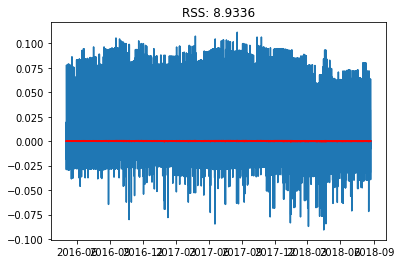

In [50]:
model = ARIMA(tf_log, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(tf_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-tf_log_diff)**2))

C:\Users\Bibek\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Bibek\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5,1,'RSS: 8.9336')

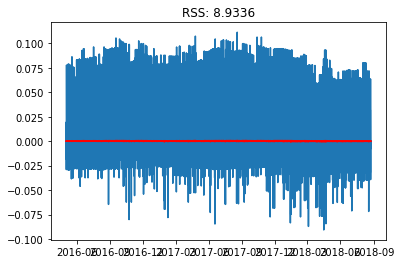

In [51]:
model = ARIMA(tf_log, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  
plt.plot(tf_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-tf_log_diff)**2))

In [52]:

#p=0
#q=0
#d=0
#pdq=[]
#aic=[]
#for p in range(3):
   # for d in range(2):
        #for q in range(3):
           # try:
               # arima_mod=sm.tsa.ARIMA(tf_log_diff,(p,d,q)).fit(transparams=True)

               # x=arima_mod.aic

               # x1= p,d,q
               # print (x1,x)

               # aic.append(x)
               # pdq.append(x1)
            #except:
             #   pass
            
#keys = pdq
#values = aic
#d = dict(zip(keys, values))
#print (d)
#minaic=min(d, key=d.get)

#for i in range(3):
 #p=minaic[0]
 #d=minaic[1]
 #q=minaic[0]
#print (p,d,q)

ARIMA sumarry and residual plots

In [53]:
#model = ARIMA(tf_log, order=(2, 0, 2))  
#results_ARIMA = model.fit(disp=-1)  
#plt.plot(tf_log_diff)
#plt.plot(results_ARIMA.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-tf_log_diff)**2))

In [54]:
#print(results_ARIMA.summary())
#plot residual errors
#residuals=pd.DataFrame(results_ARIMA.resid)
#residuals.plot(kind='kde')
#print(residuals.describe())

Scaling back Predictions

In [55]:
mod = sm.tsa.statespace.SARIMAX(training,
                                order=(1, 1, 1), 
                                enforce_stationarity=False,
                                enforce_invertibilit=False)

results = mod.fit(disp=0)

print(results.summary())

C:\Users\Bibek\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                           Statespace Model Results                           
Dep. Variable:                 diesel   No. Observations:                31749
Model:               SARIMAX(1, 1, 1)   Log Likelihood             -137534.838
Date:                Fri, 04 Jan 2019   AIC                         275075.676
Time:                        11:45:45   BIC                         275100.773
Sample:                             0   HQIC                        275083.707
                              - 31749                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8606      0.005    158.034      0.000       0.850       0.871
ma.L1         -0.9943      0.001  -1429.241      0.000      -0.996      -0.993
sigma2       339.2405      1.870    181.433      0.0

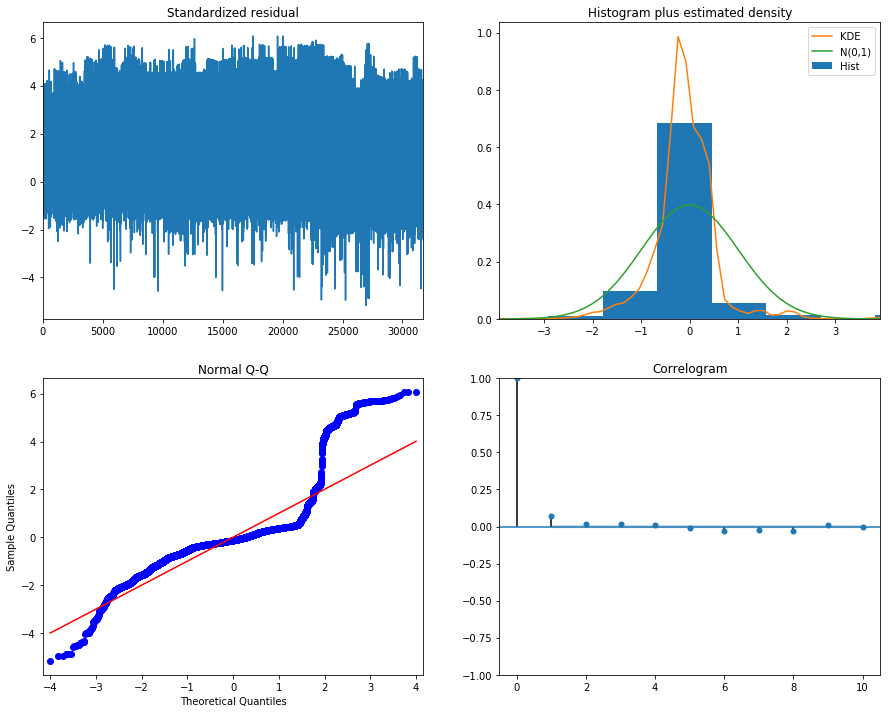

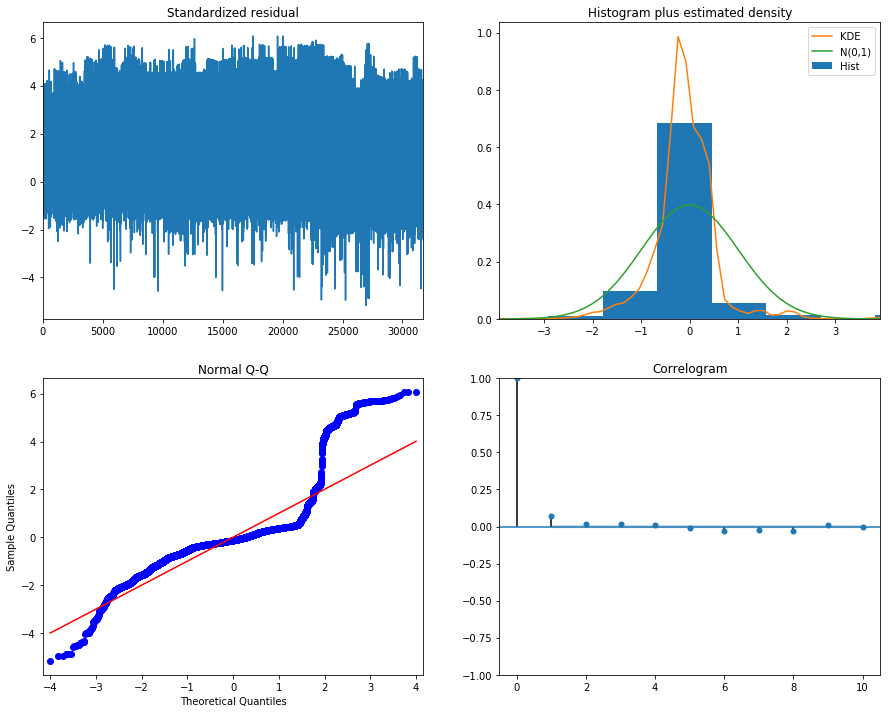

In [56]:
results.plot_diagnostics(figsize=(15,12))


In [57]:
#predictions_ARIMA_diff=pd.Series(results_ARIMA.fittedvalues,copy=True)
#predictions_ARIMA_diff=pd.Series(results.fittedvalues,copy=True)
#print (predictions_ARIMA_diff.head(50))


In [58]:
#predictions_ARIMA_diff.iloc[0]=predictions_ARIMA_diff.iloc[1]
#predictions_ARIMA_diff.tail()
#predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
#print (predictions_ARIMA_diff_cumsum.head())

In [59]:
#predictions_ARIMA_log = pd.Series(tf_log.ix[0], index=tf_log.index)
#predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
#predictions_ARIMA_log.describe()

In [60]:
#predictions_ARIMA = np.exp(predictions_ARIMA_diff)
#predictions_ARIMA.describe()

#ARIMA PREDICTION

In [61]:
#plt.plot(tf)
#plt.plot(predictions_ARIMA_diff)
#plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA_diff-training)**2)/len(training)))

In [62]:
pred = results.get_prediction(start =31750, end = 33420, dynamic=False)
pred_ci = pred.conf_int()
pred_ci.head()

C:\Users\Bibek\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


,lower diesel,upper diesel
31750,1201.062668,1296.585709
31751,1193.830767,1303.677635
31752,1188.937122,1308.450814
31753,1185.477544,1311.806716
31754,1182.967731,1314.227302


In [72]:

pred_dynamic = results.get_prediction(start =31750, end = 33420, dynamic=False)
print(pred_dynamic)
pred_dynamic_ci = pred_dynamic.conf_int(alpha=0.05)
print(pred_dynamic_ci)

       lower diesel  upper diesel
31750   1201.062668   1296.585709
31751   1193.830767   1303.677635
31752   1188.937122   1308.450814
31753   1185.477544   1311.806716
31754   1182.967731   1314.227302
31755   1181.114697   1316.003546
31756   1179.728390   1317.323764
31757   1178.680000   1318.315276
31758   1177.879630   1319.066697
31759   1177.263229   1319.640969
31760   1176.784477   1320.083465
31761   1176.409485   1320.427254
31762   1176.113235   1320.696650
31763   1175.877117   1320.909657
31764   1175.687197   1321.079686
31765   1175.532982   1321.216782
31766   1175.406527   1321.328505
31767   1175.301783   1321.420570
31768   1175.214119   1321.497322
31769   1175.139974   1321.562075
31770   1175.076593   1321.617374
31771   1175.021833   1321.665179
31772   1174.974017   1321.707008
31773   1174.931828   1321.744045
31774   1174.894221   1321.777218
31775   1174.860367   1321.807256
31776   1174.829600   1321.834739
31777   1174.801387   1321.860126
31778   1174.7

C:\Users\Bibek\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [73]:
 fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
    
ax1.plot(training, label='In-sample data', linestyle='-')
# subtract 1 only to connect it to previous point in the graph
ax1.plot(testing, label='Held-out data', linestyle='--')

# yes DatetimeIndex

pred_mean = pred_dynamic.predicted_mean
pred_ci = pred.conf_int(alpha=0.05)

ax1.plot(pred_mean, 'r', alpha=.6, label='Predicted values')
ax1.fill_between(pred_dynamic_ci.index,
              pred_dynamic_ci.iloc[:, 0],
               pred_dynamic_ci.iloc[:, 1], color='k', alpha=.2)

ax1.legend(loc='best');

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001B34595D378> (for post_execute):


ValueError: view limit minimum -3511.33934027778 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -3511.33934027778 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 864x576 with 1 Axes>

In [74]:
y_forecasted = pred_mean.values
print(y_forecasted)
y_truth = testing.values
print(y_truth)
mse = ((y_forecasted - y_truth) ** 2).mean()
rmse=np.sqrt(mse)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print(rmse)

[1248.8241881  1248.75420084 1248.69396791 ... 1248.32202969 1248.32202969
 1248.32202969]
[1289 1289 1249 ... 1349 1349 1299]
The Mean Squared Error of our forecasts is 2194.13
46.84157991570164


C:\Users\Bibek\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


[1248.90550933 1248.8241881  1248.75420084 ... 1248.32202969 1248.32202969
 1248.32202969]


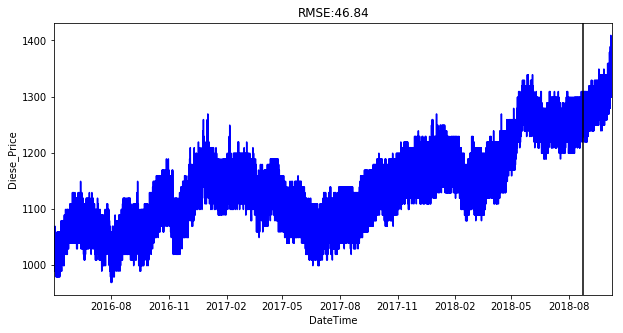

In [79]:
K=len(testing)
forecast=results.forecast(K).values
#forecast=forecast.astype(int)
#forecast=np.exp(forecast)
print(forecast)
#plot forecast results and display RMSE
plt.figure(figsize=(10,5))
#plt.plot(forecast,'r');
plt.plot(tf,'b');
plt.title('RMSE:%.2f'% np.sqrt(sum((forecast-testing)**2)/len(testing)));
plt.xlabel("DateTime");
plt.ylabel("Diese_Price");
plt.autoscale(enable=True,axis='x',tight=True)
plt.axvline(x=tf.index[split_point],color='black');#line separates training/testing

In [68]:
pred_uc = results.get_forecast(steps=20000)
print(pred_uc)
# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()
pred_ci.head()


C:\Users\Bibek\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


,lower diesel,upper diesel
31749,1212.805944,1285.005074
31750,1201.062668,1296.585709
31751,1193.830767,1303.677635
31752,1188.937122,1308.450814
31753,1185.477544,1311.806716


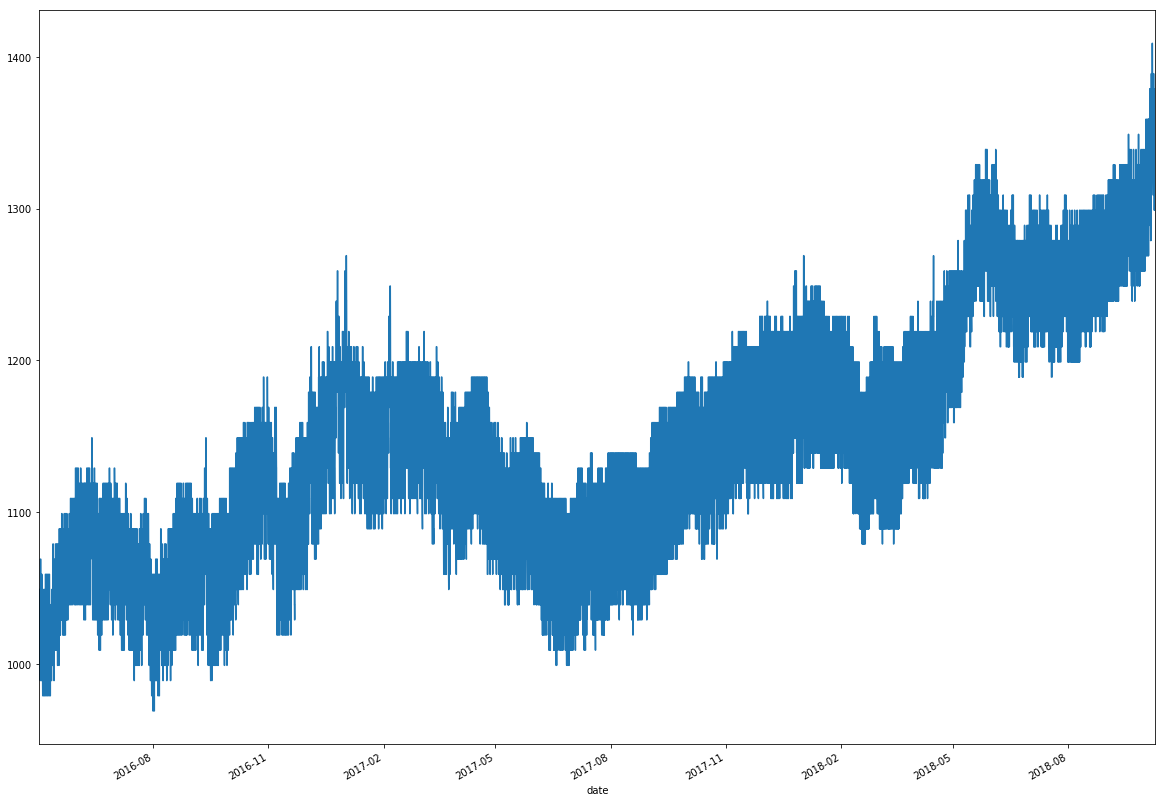

In [76]:
ax = tf.plot(label='observed', figsize=(20, 15))
#pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
#ax.fill_between(pred_ci.index,
               # pred_ci.iloc[:, 0],
               #pred_ci.iloc[:, 1], color='k', alpha=.25)
#ax.set_xlabel('Date')
#ax.set_ylabel('diesel')

#plt.legend()
#plt.show()

In [77]:

fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
    
ax1.plot(training, label='In-sample data', linestyle='-')
# subtract 1 only to connect it to previous point in the graph
ax1.plot(y_forecasted, 'r', alpha=.6, label='Predicted values')
ax1.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=.2)

ax1.legend(loc='best');

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001B34595D378> (for post_execute):


ValueError: view limit minimum -36846.48541666667 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

ValueError: view limit minimum -36846.48541666667 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 864x576 with 1 Axes>